# Clusterisation of neighborhoods

#### Sergey Sterkhov

We want to find similarities/dissimilarities in the structure of the cities

## Data Section

First of all, list of neighborhoods in this cities:
1. https://en.wikipedia.org/wiki/List_of_areas_of_London
2. https://en.wikipedia.org/wiki/Category:Districts_of_Paris
3. https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin#Localities
4. https://en.wikipedia.org/wiki/Districts_of_Madrid

This data is only the list of district names (and city where these districts are)

Secondly, data from geopy with coordinates from this districts. After joining with previous data every district will have its own latitude and longitude in dataframe

Thirdly, data from Foursquare API to find different venues around every neighborhood. We will have dataframe in format:
district name - venue - venue category

And the last one (but not the least) - our own head to transform venue categories to categories larger (i.e. combine all restaurants into one category called "Restaurants")

## Methodology

For aforementioned goal we will use clusterisation technique. It will be based on k-means algorithm on the preprocessed data, which will contain neighborhood and percentage of every venue category in terms of all venues found by foursquare API.

Also we will use Folium library to show types of districts on the maps of capitals.

Necessary libraries

In [109]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
import requests
import json
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

Function to find coordinates of Neighborhoods in city and create dataframe

In [47]:
def get_coordinates(df, city):
    lat, lon = [], []
    no_data_district = []
    for i in df["Neighborhoods"]:
        address = i + ' ' + city
        geolocator = Nominatim()
        location = geolocator.geocode(address)
        if location is None:
            print(city, i, "NO DATA")
            lat.append(99999)
            lon.append(99999)          
            no_data_district.append(i)
            continue
        lati, long = tuple([location.latitude, location.longitude])
        lat.append(lati)
        lon.append(long)
        print(city, i, lati, long)
    print(city, df.shape, len(lat), len(lon))
    df["latitude"] = pd.Series(lat)
    df["longitude"] = pd.Series(lon)
    df = df[df["latitude"] != 99999]
    print(city, "data is extracted. Size is", df.shape)
    print("neighborhoods with no data:", no_data_district, "\n total", len(no_data_district), "neighborhoods")
    return df, no_data_district

Data from wikipedia with list of neighborhoods in cities

In [45]:
df_paris = pd.read_csv("E:/Programming/coursera/capstone_project/Paris.txt", sep=";")
df_berlin = pd.read_csv("E:/Programming/coursera/capstone_project/Berlin.txt", sep=";")
df_london = pd.read_csv("E:/Programming/coursera/capstone_project/London.txt", sep=";")
df_madrid = pd.read_csv("E:/Programming/coursera/capstone_project/Madrid.txt", sep=";")

Using our function on them:

In [46]:
df_paris = get_coordinates(df_paris, "paris")[0]
df_berlin = get_coordinates(df_berlin, "Berlin")[0]
df_london = get_coordinates(df_london, "london")[0]
df_madrid = get_coordinates(df_madrid, "madrid")[0]

E:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


paris Batignolles 2.31216213496166 48.8892339
paris Belleville 2.3867013571166 48.87123635
paris Bercy 2.38536284617776 48.8352959
paris Cité des Fleurs 2.3192866 48.8913556
paris Cour des miracles 2.3836247 48.8744277
paris Épinettes 2.31986410925619 48.89374825
paris Faubourg Saint-Antoine 2.3785853 48.8507643
paris Faubourg Saint-Germain 2.32383520301419 48.85733735
paris Front de Seine NO DATA
paris Goutte d'Or 2.35604020760717 48.89267625
paris Grenelle 2.29110763790361 48.85076455
paris Jardin de Tivoli NO DATA
paris Javel, France 2.27897314805772 48.83914995
paris Quartier de La Chapelle 2.36466884105148 48.8932122
paris Latin Quarter 2.3420502 48.8487414
paris Les Halles 2.34481977417501 48.8620836
paris Le Marais 2.360742 48.8603823
paris Ménilmontant 2.40107305981761 48.8618271
paris Montmartre 2.3415715 48.8867054
paris Montparnasse 2.33242962153066 48.83767925
paris Paris Rive Gauche 2.378714 48.8299356
paris Passy 2.2567311894375 48.85715055
paris Petit-Montrouge 2.3262398

london Brunswick Park -0.1481899 51.6262191
london Bulls Cross -0.0590736 51.6784103
london Burnt Oak -0.2644503 51.6049875
london Burroughs -0.2303106 51.5863721
london Camberwell -0.0925416 51.4745706
london Cambridge Heath -0.0575296408697955 51.5322366
london Camden Town -0.1395604 51.5423045
london Canary Wharf -0.0194327474550901 51.50361775
london Cann Hall -2.1838793 50.9894789
london Canning Town 0.0134976 51.5181741
london Canonbury -0.0929833911099161 51.5485245
london Carshalton -0.1610857 51.3657883
london Castelnau -0.2376876 51.4826953
london Castle Green 0.12005152247942 51.5334036
london Catford -0.0197534 51.4453215
london Chadwell Heath 0.1297842 51.5700474
london Chalk Farm -0.1508199 51.5436179
london Charing Cross -0.1274999 51.5075654
london Charlton 0.0365359 51.4826053
london Chase Cross 0.1827807 51.6038969
london Cheam -0.2162414 51.3576155
london Chelsea -0.1682205 51.4875417
london Chelsfield 0.1272878 51.3579434
london Chessington -0.2986216 51.358336
lond

london Knightsbridge -0.166965 51.5008444
london Ladywell -0.0191917 51.4560257
london Lambeth -0.117287 51.5013012
london Lamorbey 0.1018049 51.4355092
london Lampton -0.3641365 51.4776251
london Lea Bridge -0.0458274 51.5621443
london Leamouth 3.04e-05 51.5125692
london Leaves Green 0.0305008403702498 51.33772965
london Lee 0.0114959 51.4565827
london Lessness Heath 0.14821 51.484098
london Lewisham -0.0101331 51.4624325
london Leyton -0.015681 51.5696734
london Leytonstone 0.0064237 51.5710783
london Limehouse -0.0351492 51.5133074
london Lisson Grove -0.171446 51.5262037
london Little Ilford 0.0625225 51.550298
london Little Venice -0.1824045 51.5211948
london Locksbottom 0.0625805 51.3670479
london Longford -0.4908047 51.4812266
london Longlands 0.0841774 51.4304854
london Lower Clapton -0.0550912 51.5546565
london Lower Morden -0.2163635 51.3897736
london Loxford 0.084051 51.5481943
london Maida Vale -0.1905916 51.527592
london Malden Rushett -0.3190757 51.3410523
london Manor Ho

london Upper Clapton -0.0605697 51.5668384
london Upper Holloway -0.129582030796927 51.56351695
london Upper Norwood -0.0940347 51.4164053
london Upper Ruxley 0.1436717 51.4102386
london Upper Walthamstow 0.0020978 51.5879893
london Upton 0.0263178 51.5419294
london Upton Park 0.034673 51.5369171
london Uxbridge -0.4816672 51.5449509
london Vauxhall -0.1227502 51.4858478
london Waddon -0.1181995 51.3649811
london Wallington -0.1495621 51.357945
london Walthamstow -0.0188186 51.5844701
london Walthamstow Village -0.0121451 51.5836835
london Walworth -0.0906603 51.4901142
london Wandsworth -0.1932607 51.4570271
london Wanstead 0.0277989 51.5756739
london Wapping -0.0587291 51.5054363
london Wealdstone -0.3294758 51.5936353
london Well Hall 0.0501437 51.4574683
london Welling 0.1059038 51.46529
london Wembley -0.2957562 51.5531547
london Wembley Park -0.279698309074701 51.56347855
london Wennington 0.2205249 51.5043496
london West Brompton -0.1956556 51.4873301
london West Drayton -0.4662

In [187]:
df_madrid.head()

Neighborhoods    latitude  longitude    city
0       Palacio -103.498176  25.553333  Madrid
1      Imperial   -3.717329  40.406915  Madrid
2      Pacífico   -3.678980  40.403364  Madrid
3     Recoletos   -3.685487  40.424173  Madrid
4       El Viso   -3.249911  40.438839  Madrid

Just save these dataframes, because geopy has limit of requests

In [53]:
df_london.to_csv("E:/Programming/coursera/capstone_project/london_coord.csv", encoding="utf-8", index=None, sep=";")
df_paris.to_csv("E:/Programming/coursera/capstone_project/paris_coord.csv", encoding="utf-8", index=None, sep=";")
df_berlin.to_csv("E:/Programming/coursera/capstone_project/berlin_coord.csv", encoding="utf-8", index=None, sep=";")
df_madrid.to_csv("E:/Programming/coursera/capstone_project/madrid_coord.csv", encoding="utf-8", index=None, sep=";")

Geopy could find something not in these cities, so we will do an insignificant cleaning

In [193]:
df_london = df_london[df_london["latitude"] >= -2]
df_london = df_london[df_london["latitude"] <= 2]
df_london = df_london[df_london["longitude"] >= 50]
df_london = df_london[df_london["longitude"] <= 53]
df_paris = df_paris[df_paris["latitude"] >= 1]
df_paris = df_paris[df_paris["latitude"] <= 4]
df_paris = df_paris[df_paris["longitude"] >= 47]
df_paris = df_paris[df_paris["longitude"] <= 50]
df_berlin = df_berlin[df_berlin["latitude"] >= 12]
df_berlin = df_berlin[df_berlin["latitude"] <= 15]
df_berlin = df_berlin[df_berlin["longitude"] >= 51]
df_berlin = df_berlin[df_berlin["longitude"] <= 54]
df_madrid = df_madrid[df_madrid["latitude"] >= -5]
df_madrid = df_madrid[df_madrid["latitude"] <= -2]
df_madrid = df_madrid[df_madrid["longitude"] >= 39]
df_madrid = df_madrid[df_madrid["longitude"] <= 42]

Now let's draw maps to look at our cities. Coordinates of cities i got from google:

In [92]:

# london
latitude = 51.509865
longitude = -0.118092
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lng, lat, neighborhood in zip(df_london['latitude'], df_london['longitude'], df_london['Neighborhoods']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinates of London are 51.509865, -0.118092.


In [91]:
# Paris
latitude = 48.864716
longitude = 2.349014
print('The geograpical coordinates of Paris are {}, {}.'.format(latitude, longitude))
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lng, lat, neighborhood in zip(df_paris['latitude'], df_paris['longitude'], df_paris['Neighborhoods']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinates of Paris are 48.864716, 2.349014.


In [93]:
# Berlin
latitude = 52.520008
longitude = 13.404954
print('The geograpical coordinates of Berlin are {}, {}.'.format(latitude, longitude))
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lng, lat, neighborhood in zip(df_berlin['latitude'], df_berlin['longitude'], df_berlin['Neighborhoods']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinates of Berlin are 52.520008, 13.404954.


In [94]:
# Madrid
latitude = 40.416775
longitude = -3.703790
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude, longitude))
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_madrid['longitude'], df_madrid['latitude'], df_madrid['Neighborhoods']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='black',
        fill=True,
        fill_color='blue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinates of Madrid are 40.416775, -3.70379.


Well, we have different number of districts, but it is not an issue.

Now let's add city column to dataframes. We are doing it, because for clusterisation we will use all neghborhoods together and after it we want to make a correct data split 

In [195]:
df_london["city"]="London"
df_paris["city"]="Paris"
df_berlin["city"]="Berlin"
df_madrid["city"]="Madrid"

In [196]:
df = pd.concat([df_london, df_paris, df_berlin, df_madrid])
df.shape

(766, 4)

Now we will find all venues in neighborhoods (in radius of 1 km).

For this purpose we are using foursquare API

In [197]:
CLIENT_ID = 'VTB0DRUXODRJTG0F0LOTCGRXZNQXJSTMAAIBD0IG514QXCRD'
CLIENT_SECRET = 'TMAOZPLZOI30PJ3YYQCTZ5XFHMW5Z505GKSOJTC1F1BIYXX2'
VERSION = '20180604'

In [202]:
neighborhood_latitude = df_paris["longitude"][0]
neighborhood_longitude = df_paris["latitude"][0]
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VTB0DRUXODRJTG0F0LOTCGRXZNQXJSTMAAIBD0IG514QXCRD&client_secret=TMAOZPLZOI30PJ3YYQCTZ5XFHMW5Z505GKSOJTC1F1BIYXX2&v=20180604&ll=48.8892339,2.31216213496166&radius=1000&limit=100'

Function to create dataframes of venues

In [203]:
def getNearbyVenues(cities, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for city, name, lat, lng in zip(cities, names, latitudes, longitudes):
        print(city, name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Use it on the whole dataset!

In [205]:
df_venues = getNearbyVenues(cities = df["city"],
                                 names=df['Neighborhoods'],
                                   latitudes=df['longitude'],
                                   longitudes=df['latitude']
                                  )

London Abbey Wood
London Acton
London Addington
London Addiscombe
London Albany Park
London Aldgate
London Aldwych
London Alperton
London Anerley
London Angel
London Aperfield
London Archway
London Ardleigh Green
London Arkley
London Arnos Grove
London Balham
London Bankside
London Barbican
London Barking
London Barkingside
London Barnehurst
London Barnes
London Barnes Cray
London Barnet Gate
London Barnet
London Barnsbury
London Battersea
London Bayswater
London Beckenham
London Beckton
London Becontree
London Becontree Heath
London Beddington
London Bedford Park
London Belgravia
London Bellingham
London Belmont
London Belmont
London Belsize Park
London Belvedere
London Bermondsey
London Berrylands
London Bethnal Green
London Old Bexley
London Bexleyheath
London Bickley
London Biggin Hill
London Blackfen
London Blackfriars
London Blackheath
London Blackheath Royal Standard
London Blackwall
London Blendon
London Bloomsbury
London Botany Bay
London Bounds Green
London Bow
London Bowes P

London Tower Hill
London Tufnell Park
London Tulse Hill
London Turnpike Lane
London Twickenham
London Upminster
London Upminster Bridge
London Upper Clapton
London Upper Holloway
London Upper Norwood
London Upper Ruxley
London Upper Walthamstow
London Upton
London Upton Park
London Uxbridge
London Vauxhall
London Waddon
London Wallington
London Walthamstow
London Walthamstow Village
London Walworth
London Wandsworth
London Wanstead
London Wapping
London Wealdstone
London Well Hall
London Welling
London Wembley
London Wembley Park
London Wennington
London West Brompton
London West Drayton
London West Ealing
London West Green
London West Hackney
London West Ham
London West Hampstead
London West Harrow
London West Heath
London West Hendon
London West Kensington
London West Norwood
London West Wickham
London Westcombe Park
London Westminster
London Whetstone
London White City
London Whitechapel
London Widmore
London Whitton
London Willesden
London Wimbledon
London Winchmore Hill
London Woo

Look at it! Nice...

In [206]:
df_venues = df_venues.rename(columns={"Neighborhood":"Neighborhoods"})
df_venues.head()

Neighborhoods  Neighborhood Latitude  Neighborhood Longitude  \
0    Abbey Wood              51.487621                0.114050   
1    Abbey Wood              51.487621                0.114050   
2    Abbey Wood              51.487621                0.114050   
3         Acton              51.508140               -0.273261   
4         Acton              51.508140               -0.273261   

                     Venue  Venue Latitude  Venue Longitude Venue Category  
0               Co-op Food       51.487650         0.113490  Grocery Store  
1           Bostal Gardens       51.486670         0.110462     Playground  
2  Abbey Wood Caravan Club       51.485502         0.120014     Campground  
3        London Star Hotel       51.509624        -0.272456          Hotel  
4             The Aeronaut       51.508376        -0.275216            Pub

For clusterisation we want to create N-dimension with numeric values. For this we will find percentage of every venue category in every neighborhood. It will give us coordinates for this dimension:

In [207]:
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhoods'] = df_venues['Neighborhoods'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

Neighborhoods  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Abbey Wood                  0               0                  0   
1    Abbey Wood                  0               0                  0   
2    Abbey Wood                  0               0                  0   
3         Acton                  0               0                  0   
4         Acton                  0               0                  0   

   African Restaurant  Airport Lounge  Airport Terminal  American Restaurant  \
0                   0               0                 0                    0   
1                   0               0                 0                    0   
2                   0               0                 0                    0   
3                   0               0                 0                    0   
4                   0               0                 0                    0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0         0       0                 0                       0   
1             0         0       0                 0                       0   
2             0         0       0                 0                       0   
3             0         0       0                 0                       0   
4             0         0       0                 0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                0            0              0                0          0   
1                0            0              0                0          0   
2                0            0              0                0          0   
3                0            0              0                0          0   
4                0            0              0                0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    0               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Basketball Court  Basketball Stadium  Basque Restaurant  Bathing Area  Bay  \
0                 0                   0                  0             0    0   
1                 0                   0                  0             0    0   
2                 0                   0                  0             0    0   
3                 0                   0                  0             0    0   
4                 0                   0                  0             0    0   

   Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0                0         0            0           0   
1      0                0         0            0           0   
2      0                0         0            0           0   
3      0                0         0            0           0   
4      0                0         0            0           0   

   Belgian Restaurant  Big Box Store  Bike Rental /

In [208]:
df_grouped = df_onehot.groupby('Neighborhoods').mean().reset_index()
df_grouped.head(20)

Neighborhoods  Accessories Store  Adult Boutique  \
0             Abbey Wood                0.0             0.0   
1               Abrantes                0.0             0.0   
2                Acacias                0.0             0.0   
3                  Acton                0.0             0.0   
4              Addington                0.0             0.0   
5             Addiscombe                0.0             0.0   
6                Adelfas                0.0             0.0   
7              Adlershof                0.0             0.0   
8            Albany Park                0.0             0.0   
9                Aldgate                0.0             0.0   
10               Aldwych                0.0             0.0   
11               Almagro                0.0             0.0   
12              Almenara                0.0             0.0   
13           Almendrales                0.0             0.0   
14              Alperton                0.0             0.0   
15  Alt-Hohenschönhausen                0.0             0.0   
16           Alt-Treptow                0.0             0.0   
17          Altglienicke                0.0             0.0   
18                Aluche                0.0             0.0   
19                Ambroz                0.0             0.0   

    Afghan Restaurant  African Restaurant  Airport Lounge  Airport Terminal  \
0                 0.0                 0.0             0.0               0.0   
1                 0.0                 0.0             0.0               0.0   
2                 0.0                 0.0             0.0               0.0   
3                 0.0                 0.0             0.0               0.0   
4                 0.0                 0.0             0.0               0.0   
5                 0.0                 0.0             0.0               0.0   
6                 0.0                 0.0             0.0               0.0   
7                 0.0                 0.0             0.0               0.0   
8                 0.0                 0.0             0.0               0.0   
9                 0.0                 0.0             0.0               0.0   
10                0.0                 0.0             0.0               0.0   
11                0.0                 0.0             0.0               0.0   
12                0.0                 0.0             0.0               0.0   
13                0.0                 0.0             0.0               0.0   
14                0.0                 0.0             0.0               0.0   
15                0.0                 0.0             0.0               0.0   
16                0.0                 0.0             0.0               0.0   
17                0.0                 0.0             0.0               0.0   
18                0.0                 0.0             0.0               0.0   
19                0.0                 0.0             0.0               0.0   

    American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                  0.00           0.0       0.0     0.0               0.0   
1                  0.00           0.0       0.0     0.0               0.0   
2                  0.00           0.0       0.0     0.0               0.0   
3                  0.00           0.0       0.0     0.0               0.0   
4                  0.00           0.0       0.0     0.0               0.0   
5                  0.00           0.0       0.0     0.0               0.0   
6                  0.00           0.0       0.0     0.0               0.0   
7                  0.00           0.0       0.0     0.0               0.0   
8                  0.00           0.0       0.0     0.0               0.0   
9                  0.01           0.0       0.0     0.0               0.0   
10                 0.02           0.0       0.0     0.0               0.0   
11                 0.01           0.0       0.0     0.0               0.0   
12                 0.00   

It is just a function to make a glance on venues:

In [209]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [222]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = df_grouped['Neighborhoods']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head()

Neighborhoods 1st Most Common Venue 2nd Most Common Venue  \
0    Abbey Wood            Playground            Campground   
1      Abrantes                  Park    Athletics & Sports   
2       Acacias                   Bar      Tapas Restaurant   
3         Acton                   Pub  Gym / Fitness Center   
4     Addington          Tram Station           Gas Station   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Grocery Store           Zoo Exhibit           Event Space   
1                   Bar                Bakery          Soccer Field   
2    Spanish Restaurant           Pizza Place                  Café   
3              Creperie    Athletics & Sports               Brewery   
4    English Restaurant           Bus Station           Zoo Exhibit   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Falafel Restaurant                  Farm        Farmers Market   
1  Gym / Fitness Center           Pizza Place  Fast Food Restaurant   
2           Art Gallery               Theater            Restaurant   
3                  Park  Fast Food Restaurant       Thai Restaurant   
4           Flea Market    Falafel Restaurant                  Farm   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant                  Field  
1                 Plaza     Falafel Restaurant  
2                Bakery        Photography Lab  
3         Grocery Store          Shopping Mall  
4        Farmers Market   Fast Food Restaurant

Clustering time! And merging cluster labels with other dataframe

In [211]:
# set number of clusters
kclusters = 6

df_grouped_clustering = df_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 4, 1, 0, 1, 3, 0, 4])

In [212]:
# add clustering labels
df_merged = df[["Neighborhoods", "latitude", "longitude", "city"]]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

df_merged.head(20) # check the last columns!

Neighborhoods  latitude  longitude    city  Cluster Labels  \
0       Abbey Wood  0.114050  51.487621  London             0.0   
1            Acton -0.273261  51.508140  London             4.0   
2        Addington -0.031635  51.358637  London             1.0   
3       Addiscombe -0.074282  51.379692  London             0.0   
4      Albany Park  0.125920  51.436103  London             0.0   
6          Aldgate -0.075719  51.514248  London             4.0   
7          Aldwych -0.118101  51.512940  London             1.0   
8         Alperton -0.297924  51.537768  London             1.0   
9          Anerley -0.065301  51.412848  London             5.0   
10           Angel -0.106106  51.531946  London             4.0   
11       Aperfield  0.032717  51.316629  London             4.0   
12         Archway -0.134998  51.565437  London             4.0   
13  Ardleigh Green  0.220990  51.584191  London             0.0   
14          Arkley -0.236258  51.645583  London             1.0   
15     Arnos Grove -0.126852  51.622898  London             4.0   
16          Balham -0.151443  51.442828  London             4.0   
17        Bankside -0.390474  51.512588  London             0.0   
18        Barbican -0.098683  51.520150  London             4.0   
19         Barking  0.080424  51.538992  London             0.0   
20     Barkingside  0.088624  51.585818  London             3.0   

   1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
0             Playground                  Campground         Grocery Store   
1                    Pub        Gym / Fitness Center              Creperie   
2           Tram Station                 Gas Station    English Restaurant   
3                   Park               Grocery Store    Chinese Restaurant   
4          Train Station               Grocery Store                   Pub   
6            Coffee Shop                       Hotel     Indian Restaurant   
7                Theater                Cocktail Bar           Coffee Shop   
8   Gym / Fitness Center               Metro Station     Food & Drink Shop   
9         Hardware Store                 Gas Station                   Pub   
10                   Pub                 Coffee Shop                  Café   
11      Airport Terminal                        Café         Grocery Store   
12           Coffee Shop               Grocery Store                   Pub   
13  Gym / Fitness Center                 Auto Garage                   Pub   
14                   Bay                 Golf Course           Zoo Exhibit   
15        Cricket Ground  Construction & Landscaping                  Café   
16           Coffee Shop                 Pizza Place                   Pub   
17     Indian Restaurant        Fast Food Restaurant                 Hotel   
18                 Hotel                 Coffee Shop                  Café   
19         Grocery Store        Fast Food Restaurant        Sandwich Place   
20                  Café                 Supermarket          Soccer Field   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Zoo Exhibit           Event Space    Falafel Restaurant   
1     Athletics & Sports               Brewery                  Park   
2            Bus Station           Zoo Exhibit           Flea Market   
3                 Bakery  Fast Food Restaurant                  Café   
4      Indian Restaurant         Fishing Store           Event Space   
6    Japanese Restaurant          Cocktail Bar                   Pub   
7     Italian Restaurant            Restaurant          Dessert Shop   
8      Electronics Store  Fast Food Restaurant            Hookah Bar   
9                   Park           Zoo Exhibit           Flea Market   
10  Gym / Fitness Center                 Hotel      Sushi Restaurant   
11          Carpet Store                   Pub     Fish & Chips Shop   
12    Italian Restaurant                   Bar           Pizza Place   
13         Grocery Sto

A little bit of preprocessing...

In [213]:
df_merged = df_merged.dropna()
df_merged["Cluster Labels"] = df_merged["Cluster Labels"].astype(int)

Dividing data by cities

In [214]:
df_london_merged = df_merged[df_merged["city"] == "London"]
df_paris_merged = df_merged[df_merged["city"] == "Paris"]
df_berlin_merged = df_merged[df_merged["city"] == "Berlin"]
df_madrid_merged = df_merged[df_merged["city"] == "Madrid"]

Set color scheme for the clusters

In [298]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.jet(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

cluster 0 = Dark brown

cluster 1 = Dark blue

cluster 2 = Light blue

cluster 3 = Cyan

cluster 4 = Yellow

cluster 5 = Orange

And now we will draw maps:

In [302]:
# london
latitude = 51.509865
longitude = -0.118092
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_london_merged['latitude'], df_london_merged['longitude'], 
                                    df_london_merged['Neighborhoods'], df_london_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [299]:
# Paris
latitude = 48.864716
longitude = 2.349014
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_paris_merged['latitude'], df_paris_merged['longitude'], 
                                    df_paris_merged['Neighborhoods'], df_paris_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [300]:
# Berlin
latitude = 52.520008
longitude = 13.404954
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_berlin_merged['latitude'], df_berlin_merged['longitude'], 
                                    df_berlin_merged['Neighborhoods'], df_berlin_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [301]:
# Madrid
latitude = 40.416775
longitude = -3.703790
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_madrid_merged['latitude'], df_madrid_merged['longitude'], 
                                    df_madrid_merged['Neighborhoods'], df_madrid_merged['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Absolute values of different labels in every city:

In [294]:
cluster_counts = pd.DataFrame(df_merged["Cluster Labels"].value_counts()).join(pd.DataFrame(df_london_merged["Cluster Labels"].value_counts()), lsuffix='_caller')
cluster_counts = cluster_counts.join(pd.DataFrame(df_paris_merged["Cluster Labels"].value_counts()), lsuffix='_caller').join(pd.DataFrame(df_berlin_merged["Cluster Labels"].value_counts()), lsuffix='_caller').join(pd.DataFrame(df_madrid_merged["Cluster Labels"].value_counts()), lsuffix='_caller')
cluster_counts.columns = ['All', 'London', 'Paris', 'Berlin', 'Madrid']
cluster_counts = cluster_counts.fillna(0).astype(int)
cluster_counts

All  London  Paris  Berlin  Madrid
4  289     277      0      10       2
1  247      91     26      46      84
0   81      74      0       0       7
3   59      21      0      35       3
5   46      37      0       4       5
2   19      19      0       0       0

Percantage of different cluster labels in cities:

In [281]:
london_perc = df_london_merged["Cluster Labels"].value_counts()/sum(df_london_merged["Cluster Labels"].value_counts())
paris_perc = df_paris_merged["Cluster Labels"].value_counts()/sum(df_paris_merged["Cluster Labels"].value_counts())
berlin_perc = df_berlin_merged["Cluster Labels"].value_counts()/sum(df_berlin_merged["Cluster Labels"].value_counts())
madrid_perc = df_madrid_merged["Cluster Labels"].value_counts()/sum(df_madrid_merged["Cluster Labels"].value_counts())
all_perc = df_merged["Cluster Labels"].value_counts()/sum(df_merged["Cluster Labels"].value_counts())

In [296]:
cluster_counts_perc = pd.DataFrame(all_perc).join(pd.DataFrame(london_perc), lsuffix='_caller')
cluster_counts_perc = cluster_counts_perc.join(pd.DataFrame(paris_perc), lsuffix='_caller').join(pd.DataFrame(berlin_perc), lsuffix='_caller').join(pd.DataFrame(madrid_perc), lsuffix='_caller')
cluster_counts_perc.columns = ['All', 'London', 'Paris', 'Berlin', 'Madrid']
cluster_counts_perc = cluster_counts_perc.fillna(0)
round(cluster_counts_perc*100, 1)

All  London  Paris  Berlin  Madrid
4  39.0    53.4    0.0    10.5     2.0
1  33.3    17.5  100.0    48.4    83.2
0  10.9    14.3    0.0     0.0     6.9
3   8.0     4.0    0.0    36.8     3.0
5   6.2     7.1    0.0     4.2     5.0
2   2.6     3.7    0.0     0.0     0.0

In [304]:
df_berlin_merged[df_berlin_merged["Cluster Labels"] == 4]

Neighborhoods   latitude  longitude    city  Cluster Labels  \
6    Friedrichshain  13.450290  52.512215  Berlin               4   
10      Blankenburg  13.454182  52.593211  Berlin               4   
15     Blankenfelde  13.388447  52.618627  Berlin               4   
40       Zehlendorf  13.258930  52.434322  Berlin               4   
44       Schöneberg  13.355190  52.482157  Berlin               4   
58     Johannisthal  13.504547  52.445911  Berlin               4   
63  Oberschöneweide  13.523476  52.462456  Berlin               4   
78       Falkenberg  13.540030  52.569300  Berlin               4   
79          Malchow  13.482093  52.579867  Berlin               4   
92           Lübars  13.353020  52.614647  Berlin               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6                   Café           Coffee Shop                   Bar   
10                  Café      Greek Restaurant            Playground   
15                  Café    Miscellaneous Shop               Stables   
40                  Café             Drugstore    Italian Restaurant   
44                  Café      Doner Restaurant             Drugstore   
58           Supermarket           Pizza Place      Sushi Restaurant   
63                  Café          Burger Joint        History Museum   
78                  Café           Coffee Shop  Ethiopian Restaurant   
79                  Café                Bakery     German Restaurant   
92        Ice Cream Shop     German Restaurant               Butcher   

   4th Most Common Venue 5th Most Common Venue  6th Most Common Venue  \
6            Record Shop    Italian Restaurant        Thai Restaurant   
10              Bus Stop                  Farm         Farmers Market   
15           Zoo Exhibit    Falafel Restaurant                   Farm   
40      Doner Restaurant  Gym / Fitness Center           Gourmet Shop   
44                   Pub           Supermarket     Italian Restaurant   
58          Tram Station               Taverna                    Pub   
63      Asian Restaurant     German Restaurant  Vietnamese Restaurant   
78               Exhibit    Falafel Restaurant                   Farm   
79              Bus Stop     Fondue Restaurant                   Farm   
92                   Pub         Fishing Store            Fish Market   

            7th Most Common Venue 8th Most Common Venue  
6   Vegetarian / Vegan Restaurant                Hostel  
10           Fast Food Restaurant                 Field  
15                 Farmers Market  Fast Food Restaurant  
40                    Pizza Place                  Tree  
44              Indian Restaurant            Baby Store  
58                  Movie Theater          Burger Joint  
63                    Supermarket        Farmers Market  
78                 Farmers Market  Fast Food Restaurant  
79                 Farmers Market  Fast Food Restaurant  
92              Fish & Chips Shop           Film Studio

In [276]:
df_london_merged[df_london_merged["Cluster Labels"] == 3].head()

Neighborhoods  latitude  longitude    city  Cluster Labels  \
20    Barkingside  0.088624  51.585818  London               3   
30        Beckton  0.059426  51.516080  London               3   
105     Colindale -0.256773  51.591519  London               3   
113      Coulsdon -0.139351  51.319972  London               3   
170       Feltham -0.410659  51.444223  London               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
20                   Café           Supermarket          Soccer Field   
30            Supermarket                   Pub        Shopping Plaza   
105           Supermarket  Fast Food Restaurant                   Pub   
113           Supermarket              Pharmacy     Martial Arts Dojo   
170           Supermarket  Fast Food Restaurant           Pizza Place   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
20          Metro Station     French Restaurant              Fountain   
30   Gym / Fitness Center          Soccer Field         Grocery Store   
105            Food Court  Outdoor Supply Store                  Park   
113         Grocery Store                   Pub           Coffee Shop   
170              Pharmacy    Mexican Restaurant        Discount Store   

    7th Most Common Venue 8th Most Common Venue  
20                Exhibit    Falafel Restaurant  
30         Clothing Store                 Hotel  
105  Gym / Fitness Center       Bubble Tea Shop  
113           Zoo Exhibit           Fish Market  
170        Sandwich Place         Historic Site

In [277]:
df_berlin_merged[df_berlin_merged["Cluster Labels"] == 3].head()

Neighborhoods   latitude  longitude    city  Cluster Labels  \
11           Heinersdorf  13.437015  52.572825  Berlin               3   
12                 Karow  13.486276  52.615087  Berlin               3   
17  Französisch Buchholz  13.428110  52.610513  Berlin               3   
19             Rosenthal  13.375519  52.598319  Berlin               3   
20           Wilhelmsruh  13.362206  52.588012  Berlin               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
11           Supermarket          Tram Station    Chinese Restaurant   
12            Restaurant      Business Service              Bus Stop   
17           Supermarket             Drugstore           Flower Shop   
19           Supermarket          Tram Station       Automotive Shop   
20              Bus Stop           Supermarket              Pharmacy   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11      Business Service           Fish Market           Flea Market   
12           Supermarket      Cuban Restaurant       Cultural Center   
17       Organic Grocery         Fishing Store               Exhibit   
19     German Restaurant                 Hotel         Fishing Store   
20                Bakery           Post Office      Asian Restaurant   

   7th Most Common Venue 8th Most Common Venue  
11               Exhibit    Falafel Restaurant  
12                  Farm        Farmers Market  
17    Falafel Restaurant                  Farm  
19               Exhibit    Falafel Restaurant  
20    Mexican Restaurant      Football Stadium

Well, there i tried to understand what each cluster means, but didn't find anything interesting. 

So i decided to make less categories, but make them larger, i.e. Greek restaurant and Seafood restaurant will be in category "Restaurant" etc

So i manually made csv file with dictionary for every venue category:

In [309]:
pd.DataFrame(df_onehot.columns).to_csv("E:/Programming/coursera/capstone_project/venues_types.csv", encoding="utf-8", index=None, sep=";")

It works like this:

In [424]:
new_types = pd.read_csv("E:/Programming/coursera/capstone_project/venues_types_done.csv", sep=";", index_col=0)
new_types.head()

2
1                             
Accessories Store        Store
Adult Boutique           Store
Afghan Restaurant   Restaurant
African Restaurant  Restaurant
Airport Lounge       Transport

In [425]:
venue_types = new_types.to_dict()['2']

And use this dictionary on our dataset:

In [427]:
df_grouped2 = df_grouped.rename(columns=venue_types)
df_grouped2 = df_grouped2.groupby(df_grouped2.columns, axis=1).sum()
df_grouped2.head()

Art       Bar  Beauty  Building  Business      Caf?  Education  \
0  0.000000  0.000000     0.0       0.0       0.0  0.000000        0.0   
1  0.000000  0.111111     0.0       0.0       0.0  0.222222        0.0   
2  0.061224  0.142857     0.0       0.0       0.0  0.163265        0.0   
3  0.000000  0.260870     0.0       0.0       0.0  0.130435        0.0   
4  0.000000  0.000000     0.0       0.0       0.0  0.000000        0.0   

        Fun  Health     Hotel     Music Neighborhoods  Other      Park  \
0  0.333333     0.0  0.333333  0.000000    Abbey Wood    0.0  0.000000   
1  0.000000     0.0  0.000000  0.000000      Abrantes    0.0  0.111111   
2  0.061224     0.0  0.000000  0.020408       Acacias    0.0  0.020408   
3  0.000000     0.0  0.043478  0.000000         Acton    0.0  0.043478   
4  0.000000     0.0  0.000000  0.000000     Addington    0.0  0.000000   

   Religion  Restaurant   Service     Space     Sport     Store   Tourism  \
0       0.0    0.000000  0.000000  0.000000  0.000000  0.333333  0.000000   
1       0.0    0.111111  0.000000  0.000000  0.333333  0.000000  0.111111   
2       0.0    0.224490  0.020408  0.020408  0.081633  0.163265  0.020408   
3       0.0    0.173913  0.000000  0.000000  0.217391  0.130435  0.000000   
4       0.0    0.250000  0.000000  0.000000  0.000000  0.000000  0.000000   

   Transport  Water  
0       0.00    0.0  
1       0.00    0.0  
2       0.00    0.0  
3       0.00    0.0  
4       0.75    0.0

And now we can repeat all our previous clusterisation path:

In [428]:
df_grouped2 = df_grouped2[['Neighborhoods', 	'Art', 	'Bar', 	'Beauty', 	'Building', 	'Business', 	'Caf?', 	'Education', 	'Fun', 	'Health', 	'Hotel', 	'Music', 	'Other', 	'Park', 	'Religion', 	'Restaurant', 	'Service', 	'Space', 	'Sport', 	'Store', 	'Tourism', 	'Transport', 	'Water']]


In [429]:
def return_most_common_venues2(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [433]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhoods'] = df_grouped2['Neighborhoods']

for ind in np.arange(df_grouped2.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(df_grouped2.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted2.head()

Neighborhoods 1st Most Common Venue 2nd Most Common Venue  \
0    Abbey Wood                 Hotel                 Store   
1      Abrantes                 Sport                  Caf?   
2       Acacias            Restaurant                  Caf?   
3         Acton                   Bar                 Sport   
4     Addington             Transport            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Fun                 Water                   Bar   
1               Tourism                   Bar            Restaurant   
2                 Store                   Bar                 Sport   
3            Restaurant                 Store                  Caf?   
4                 Water                 Hotel                   Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Beauty              Building              Business   
1                  Park                 Water                Health   
2                   Art                   Fun                  Park   
3                  Park                 Hotel                 Water   
4                Beauty              Building              Business   

  9th Most Common Venue 10th Most Common Venue  
0                  Caf?              Education  
1                Beauty               Building  
2                 Music                Service  
3                   Fun                 Beauty  
4                  Caf?              Education

In [434]:
# set number of clusters
kclusters = 6

df_grouped_clustering2 = df_grouped2.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering2)

neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10], len(kmeans.labels_)

(array([4, 3, 1, 3, 5, 2, 2, 1, 5, 1]), 734)

In [435]:
# add clustering labels
df_merged2 = df[["Neighborhoods", "latitude", "longitude", "city"]]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged2 = df_merged2.join(neighborhoods_venues_sorted2.set_index('Neighborhoods'), on='Neighborhoods')
print(df_merged2.shape)
df_merged2.head() # check the last columns!

(766, 15)


Neighborhoods  latitude  longitude    city  Cluster Labels  \
0    Abbey Wood  0.114050  51.487621  London             4.0   
1         Acton -0.273261  51.508140  London             3.0   
2     Addington -0.031635  51.358637  London             5.0   
3    Addiscombe -0.074282  51.379692  London             2.0   
4   Albany Park  0.125920  51.436103  London             5.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                 Hotel                 Store                   Fun   
1                   Bar                 Sport            Restaurant   
2             Transport            Restaurant                 Water   
3                 Store            Restaurant                  Caf?   
4                   Bar                 Store            Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                 Water                   Bar                Beauty   
1                 Store                  Caf?                  Park   
2                 Hotel                   Bar                Beauty   
3                  Park                 Water                Health   
4             Transport                 Water                Health   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Building              Business                  Caf?   
1                 Hotel                 Water                   Fun   
2              Building              Business                  Caf?   
3                   Bar                Beauty              Building   
4                Beauty              Building              Business   

  10th Most Common Venue  
0              Education  
1                 Beauty  
2              Education  
3               Business  
4                   Caf?

In [389]:
df_merged2 = df_merged2.dropna()
df_merged2["Cluster Labels"] = df_merged2["Cluster Labels"].astype(int)
df_london_merged2 = df_merged2[df_merged2["city"] == "London"]
df_paris_merged2 = df_merged2[df_merged2["city"] == "Paris"]
df_berlin_merged2 = df_merged2[df_merged2["city"] == "Berlin"]
df_madrid_merged2 = df_merged2[df_merged2["city"] == "Madrid"]

Draw Maps:

In [390]:
# london
latitude = 51.509865
longitude = -0.118092
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_london_merged2['latitude'], df_london_merged2['longitude'], 
                                    df_london_merged2['Neighborhoods'], df_london_merged2['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [391]:
# Paris
latitude = 48.864716
longitude = 2.349014
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_paris_merged2['latitude'], df_paris_merged2['longitude'], 
                                    df_paris_merged2['Neighborhoods'], df_paris_merged2['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [392]:
# Berlin
latitude = 52.520008
longitude = 13.404954
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_berlin_merged2['latitude'], df_berlin_merged2['longitude'], 
                                    df_berlin_merged2['Neighborhoods'], df_berlin_merged2['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [393]:
# Madrid
latitude = 40.416775
longitude = -3.703790
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to the map
markers_colors = []
for lon, lat, neigh, cluster in zip(df_madrid_merged2['latitude'], df_madrid_merged2['longitude'], 
                                    df_madrid_merged2['Neighborhoods'], df_madrid_merged2['Cluster Labels']):
    label = folium.Popup('Neighbourhoods are: \n'+ str(neigh) + '\t Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now we're talking about!

Number of clusters in cities:

In [394]:
cluster_counts = pd.DataFrame(df_merged2["Cluster Labels"].value_counts()).join(pd.DataFrame(df_london_merged2["Cluster Labels"].value_counts()), lsuffix='_caller')
cluster_counts = cluster_counts.join(pd.DataFrame(df_paris_merged2["Cluster Labels"].value_counts()), lsuffix='_caller').join(pd.DataFrame(df_berlin_merged2["Cluster Labels"].value_counts()), lsuffix='_caller').join(pd.DataFrame(df_madrid_merged2["Cluster Labels"].value_counts()), lsuffix='_caller')
cluster_counts.columns = ['All', 'London', 'Paris', 'Berlin', 'Madrid']
cluster_counts = cluster_counts.fillna(0).astype(int)
cluster_counts

All  London  Paris  Berlin  Madrid
1  247     136     24      30      57
2  198     162      1      21      14
4  101      71      0      18      12
3   78      64      0       6       8
5   76      52      1      17       6
0   41      34      0       3       4

Percentage of clusters:

In [396]:
london_perc2 = df_london_merged2["Cluster Labels"].value_counts()/sum(df_london_merged2["Cluster Labels"].value_counts())
paris_perc2 = df_paris_merged2["Cluster Labels"].value_counts()/sum(df_paris_merged2["Cluster Labels"].value_counts())
berlin_perc2 = df_berlin_merged2["Cluster Labels"].value_counts()/sum(df_berlin_merged2["Cluster Labels"].value_counts())
madrid_perc2 = df_madrid_merged2["Cluster Labels"].value_counts()/sum(df_madrid_merged2["Cluster Labels"].value_counts())
all_perc2 = df_merged2["Cluster Labels"].value_counts()/sum(df_merged2["Cluster Labels"].value_counts())
cluster_counts_perc2 = pd.DataFrame(all_perc2).join(pd.DataFrame(london_perc2), lsuffix='_caller')
cluster_counts_perc2 = cluster_counts_perc2.join(pd.DataFrame(paris_perc2), lsuffix='_caller').join(pd.DataFrame(berlin_perc2), lsuffix='_caller').join(pd.DataFrame(madrid_perc2), lsuffix='_caller')
cluster_counts_perc2.columns = ['All', 'London', 'Paris', 'Berlin', 'Madrid']
cluster_counts_perc2 = cluster_counts_perc2.fillna(0)
round(cluster_counts_perc2*100, 1)

All  London  Paris  Berlin  Madrid
1  33.3    26.2   92.3    31.6    56.4
2  26.7    31.2    3.8    22.1    13.9
4  13.6    13.7    0.0    18.9    11.9
3  10.5    12.3    0.0     6.3     7.9
5  10.3    10.0    3.8    17.9     5.9
0   5.5     6.6    0.0     3.2     4.0

Look at it. London is almost like Berlin. Let's make a glance at different clusters. Here is the function, which takes 3 neghborhoods of certain cluster from every city (if these neighborhoods exist)

In [446]:
def cluster_example(df, clus):
    df_l = df[df["city"] == "London"]
    df_p = df[df["city"] == "Paris"]
    df_b = df[df["city"] == "Berlin"]
    df_m = df[df["city"] == "Madrid"]
    return pd.concat([
        df_l[df_l["Cluster Labels"] == clus].head(3),
        df_p[df_p["Cluster Labels"] == clus].head(3),
        df_b[df_b["Cluster Labels"] == clus].head(3),
        df_m[df_m["Cluster Labels"] == clus].head(3)], axis=0)

In [447]:
cluster_example(df_merged2, 0)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
23    Barnes Cray   0.189094  51.453762  London             0.0   
24    Barnet Gate  -0.242985  51.641827  London             0.0   
31      Becontree   0.127538  51.549265  London             0.0   
41         Dahlem  13.281098  52.457380  Berlin             0.0   
62      Bohnsdorf  13.570665  52.402243  Berlin             0.0   
85  Reinickendorf  13.295287  52.604763  Berlin             0.0   
12      Entrevías  -3.669182  40.380284  Madrid             0.0   
40         Hellín  -3.616769  40.431322  Madrid             0.0   
55     Marroquina  -3.641344  40.409902  Madrid             0.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
23                 Sport                   Fun                 Water   
24                   Bar                  Park                 Water   
31               Tourism              Building                  Park   
41                  Park                 Store            Restaurant   
62              Building               Service            Restaurant   
85               Tourism                 Store                  Park   
12                 Sport                  Caf?                  Park   
40                 Store                 Sport                  Park   
55                  Park                   Bar                 Sport   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
23                 Hotel                   Bar                Beauty   
24                 Hotel                Beauty              Building   
31                 Water                 Hotel                   Bar   
41                 Water                Health                   Bar   
62                  Park                 Water                Health   
85                 Hotel                 Water                Health   
12             Transport                 Water                Health   
40             Transport                   Fun                 Water   
55                 Water                 Hotel                Beauty   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
23              Building              Business                  Caf?   
24              Business                  Caf?             Education   
31                Beauty              Business                  Caf?   
41                Beauty              Building              Business   
62                   Bar                Beauty              Business   
85                   Bar                Beauty              Building   
12                   Bar                Beauty              Building   
40                Health                   Bar                Beauty   
55              Building              Business                  Caf?   

   10th Most Common Venue  
23              Education  
24                    Fun  
31              Education  
41                   Caf?  
62                   Caf?  
85               Business  
12               Business  
40               Building  
55              Education

That's like parking zone

In [448]:
cluster_example(df_merged2, 1)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
6        Aldgate  -0.075719  51.514248  London             1.0   
7        Aldwych  -0.118101  51.512940  London             1.0   
10         Angel  -0.106106  51.531946  London             1.0   
0    Batignolles   2.312162  48.889234   Paris             1.0   
1     Belleville   2.386701  48.871236   Paris             1.0   
2          Bercy   2.385363  48.835296   Paris             1.0   
0          Mitte  13.402376  52.517690  Berlin             1.0   
1         Moabit  13.342542  52.530102  Berlin             1.0   
7      Kreuzberg  13.411914  52.497644  Berlin             1.0   
1       Imperial  -3.717329  40.406915  Madrid             1.0   
2       Pacífico  -3.678980  40.403364  Madrid             1.0   
3      Recoletos  -3.685487  40.424173  Madrid             1.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6             Restaurant                  Caf?                   Bar   
7             Restaurant                 Store                  Caf?   
10            Restaurant                  Caf?                 Store   
0             Restaurant                  Caf?                 Hotel   
1             Restaurant                  Caf?                   Bar   
2                  Store            Restaurant                   Bar   
0                    Art            Restaurant                 Store   
1             Restaurant                 Store                  Caf?   
7             Restaurant                  Caf?                 Store   
1             Restaurant                  Caf?                 Hotel   
2             Restaurant                   Bar                  Caf?   
3             Restaurant                 Store                  Caf?   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
6                  Hotel                 Store                 Sport   
7                    Fun                   Bar                   Art   
10                   Bar                 Hotel                 Sport   
0                    Bar                 Store                  Park   
1                  Store                   Fun                 Music   
2                   Caf?             Transport                 Hotel   
0                   Caf?                 Hotel               Tourism   
1                    Bar                 Hotel                 Sport   
7                    Fun                   Bar                 Water   
1                Tourism                 Sport                  Park   
2                  Store                   Art                 Sport   
3                  Hotel                   Art                   Fun   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
6                    Art                   Fun               Tourism   
7                  Hotel                 Sport                 Space   
10                   Fun                 Water                  Park   
0                  Sport                 Water                   Fun   
1                Service                  Park                 Hotel   
2                   Park                   Art               Tourism   
0                  Other                   Bar                   Fun   
1                Service                  Park             Transport   
7              Transport                  Park                   Art   
1                  Store                   Bar                Beauty   
2              Transport                   Fun               Tourism   
3                Tourism                 Sport                   Bar   

   10th Most Common Venue  
6                Building  
7                Building  
10                 Health  
0                  Beauty  
1                  Beauty  
2                   Sport  
0                   Music  
1                  Health  
7                   Space  
1                   Water  
2                    Park

Restaurant zone

In [449]:
cluster_example(df_merged2, 2)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
3          Addiscombe  -0.074282  51.379692  London             2.0   
12            Archway  -0.134998  51.565437  London             2.0   
16             Balham  -0.151443  51.442828  London             2.0   
20  Paris Rive Gauche   2.378714  48.829936   Paris             2.0   
2        Hansaviertel  13.341872  52.519123  Berlin             2.0   
6      Friedrichshain  13.450290  52.512215  Berlin             2.0   
8     Prenzlauer Berg  13.428565  52.539847  Berlin             2.0   
23            Adelfas  -3.671767  40.400280  Madrid             2.0   
28     Fuentelarreina  -3.731735  40.482680  Madrid             2.0   
35       Pueblo Nuevo  -3.644171  40.435033  Madrid             2.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3                  Store            Restaurant                  Caf?   
12                  Caf?            Restaurant                   Bar   
16                  Caf?            Restaurant                 Store   
20                  Caf?            Restaurant                 Store   
2                   Caf?                 Store                  Park   
6                   Caf?            Restaurant                 Store   
8             Restaurant                 Store                  Caf?   
23            Restaurant                  Caf?                 Store   
28                  Caf?                 Store                  Park   
35                 Store            Restaurant                  Caf?   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3                   Park                 Water                Health   
12                 Store             Transport                 Sport   
16                   Bar                 Sport                Health   
20                  Park                   Bar                   Fun   
2             Restaurant                 Water                   Fun   
6                    Bar                   Fun                   Art   
8                    Bar                   Fun                  Park   
23                   Bar                 Sport                   Fun   
28                 Sport            Restaurant                 Water   
35                   Bar               Tourism             Transport   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3                    Bar                Beauty              Building   
12                 Hotel                 Water                   Fun   
16             Transport                 Hotel                 Water   
20                 Hotel                 Music              Building   
2              Transport                   Art                 Hotel   
6                Tourism                 Hotel                Health   
8                  Music             Transport                Beauty   
23             Transport                 Hotel                   Art   
28                Health                   Bar                Beauty   
35                 Water                Health                Beauty   

   10th Most Common Venue  
3                Business  
12                 Beauty  
16                    Fun  
20                    Art  
2                   Sport  
6                   Sport  
8                   Hotel  
23                   Park  
28               Building  
35               Building

Cafe zone

In [450]:
cluster_example(df_merged2, 3)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
1           Acton  -0.273261  51.508140  London             3.0   
14         Arkley  -0.236258  51.645583  London             3.0   
21     Barnehurst   0.161757  51.462687  London             3.0   
3      Tiergarten  13.357260  52.509778  Berlin             3.0   
34     Hakenfelde  13.196769  52.560991  Berlin             3.0   
42     Nikolassee  13.198145  52.426249  Berlin             3.0   
8   Casa de Campo  -3.760889  40.403529  Madrid             3.0   
10       Abrantes  -3.727985  40.380998  Madrid             3.0   
37  San Cristóbal  -3.585284  40.428028  Madrid             3.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1                    Bar                 Sport            Restaurant   
14                 Water                   Fun             Transport   
21                   Bar                  Caf?            Restaurant   
3                    Art            Restaurant                  Caf?   
34                   Fun                 Water             Transport   
42               Tourism                 Sport               Service   
8                    Fun                   Bar            Restaurant   
10                 Sport                  Caf?               Tourism   
37                   Bar                 Sport                 Other   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                  Store                  Caf?                  Park   
14                   Bar                Beauty              Building   
21             Transport                 Water                 Hotel   
3                   Park               Tourism                   Bar   
34                   Bar                Beauty              Building   
42                  Caf?             Transport                 Water   
8              Transport                 Water                 Hotel   
10                   Bar            Restaurant                  Park   
37                 Water                 Hotel                Beauty   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1                  Hotel                 Water                   Fun   
14              Business                  Caf?             Education   
21                Beauty              Building              Business   
3               Building                Health                Beauty   
34              Business                  Caf?             Education   
42                Health                   Bar                Beauty   
8                 Beauty              Building              Business   
10                 Water                Health                Beauty   
37              Building              Business                  Caf?   

   10th Most Common Venue  
1                  Beauty  
14                 Health  
21              Education  
3                Business  
34                 Health  
42               Building  
8                    Caf?  
10               Building  
37              Education

Something like bar zone?

In [451]:
cluster_example(df_merged2, 4)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
0      Abbey Wood   0.114050  51.487621  London             4.0   
8        Alperton  -0.297924  51.537768  London             4.0   
30        Beckton   0.059426  51.516080  London             4.0   
4         Wedding  13.341970  52.550123  Berlin             4.0   
5   Gesundbrunnen  13.384846  52.550920  Berlin             4.0   
11    Heinersdorf  13.437015  52.572825  Berlin             4.0   
11      Orcasitas  -3.712509  40.367279  Madrid             4.0   
13        Pavones  -3.632322  40.398558  Madrid             4.0   
32        Orcasur  -3.698765  40.374156  Madrid             4.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Hotel                 Store                   Fun   
8                  Store            Restaurant                 Sport   
30                 Store                 Sport             Transport   
4                  Store                   Bar                 Sport   
5                  Store            Restaurant                  Caf?   
11                 Store              Business            Restaurant   
11                 Store               Tourism                  Caf?   
13                 Store                   Bar                 Sport   
32                 Store                   Bar            Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Water                   Bar                Beauty   
8                   Caf?             Transport                   Fun   
30                   Bar                 Hotel                 Water   
4             Restaurant                  Park             Transport   
5              Transport                   Bar                 Hotel   
11             Transport                 Water                Health   
11                 Water                 Hotel                   Bar   
13                 Water                 Hotel                Beauty   
32                  Caf?                 Water                 Hotel   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0               Building              Business                  Caf?   
8                  Water                Health                   Bar   
30                Health                Beauty              Building   
4                  Water                   Fun                Beauty   
5                 Health                   Art                 Sport   
11                   Bar                Beauty              Building   
11                Beauty              Building              Business   
13              Building              Business                  Caf?   
32                Beauty              Building              Business   

   10th Most Common Venue  
0               Education  
8                  Beauty  
30               Business  
4                Building  
5                    Park  
11                   Caf?  
11              Education  
13              Education  
32              Education

A lot of stores. May be bedroom suburbs?

In [452]:
cluster_example(df_merged2, 5)

Neighborhoods   latitude  longitude    city  Cluster Labels  \
2         Addington  -0.031635  51.358637  London             5.0   
4       Albany Park   0.125920  51.436103  London             5.0   
9           Anerley  -0.065301  51.412848  London             5.0   
21            Passy   2.256731  48.857151   Paris             5.0   
12            Karow  13.486276  52.615087  Berlin             5.0   
14           Pankow  13.436383  52.597811  Berlin             5.0   
19        Rosenthal  13.375519  52.598319  Berlin             5.0   
16  Villaverde Alto  -3.711587  40.341517  Madrid             5.0   
58         Butarque  -3.742763  40.354215  Madrid             5.0   
59          Amposta  -3.622273  40.425973  Madrid             5.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2              Transport            Restaurant                 Water   
4                    Bar                 Store            Restaurant   
9                    Bar                 Store                  Park   
21                 Sport               Tourism                   Fun   
12                 Store              Business            Restaurant   
14            Restaurant             Transport                 Water   
19                 Store             Transport            Restaurant   
16            Restaurant             Transport                 Store   
58             Transport                 Water                   Bar   
59             Transport                 Store            Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2                  Hotel                   Bar                Beauty   
4              Transport                 Water                Health   
9              Transport                 Water                Health   
21             Transport                 Water                Health   
12             Transport                 Water                Health   
14                 Hotel                   Bar                Beauty   
19                 Hotel                 Water                Health   
16                  Caf?                 Water                Health   
58                Beauty              Building              Business   
59                  Caf?                  Park                   Fun   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
2               Building              Business                  Caf?   
4                 Beauty              Building              Business   
9                 Beauty              Building              Business   
21                   Bar                Beauty              Building   
12                   Bar                Beauty              Building   
14              Building              Business                  Caf?   
19                   Bar                Beauty              Building   
16                   Bar                Beauty              Building   
58                  Caf?             Education                   Fun   
59                 Water                Health                   Bar   

   10th Most Common Venue  
2               Education  
4                    Caf?  
9                    Caf?  
21               Business  
12                   Caf?  
14              Education  
19               Business  
16               Business  
58                 Health  
59                 Beauty

I guess it is railroad stations, airports etc

Here i try to have a look at distribution for every neighborhood:

In [441]:
df_all_perc = df_merged2[["Neighborhoods", "latitude", "longitude", "city", "Cluster Labels"]].join(df_grouped2.set_index('Neighborhoods'), on="Neighborhoods")
df_all_perc[df_all_perc["Cluster Labels"] == 0].head()

Neighborhoods  latitude  longitude    city  Cluster Labels  Art  Bar  \
23     Barnes Cray  0.189094  51.453762  London             0.0  0.0  0.0   
24     Barnet Gate -0.242985  51.641827  London             0.0  0.0  0.5   
31       Becontree  0.127538  51.549265  London             0.0  0.0  0.0   
42      Berrylands -0.284802  51.393781  London             0.0  0.0  0.0   
70  Brunswick Park -0.148190  51.626219  London             0.0  0.0  0.0   

    Beauty  Building  Business  Caf?  Education       Fun  Health  Hotel  \
23     0.0  0.000000       0.0  0.00        0.0  0.333333     0.0    0.0   
24     0.0  0.000000       0.0  0.00        0.0  0.000000     0.0    0.0   
31     0.0  0.333333       0.0  0.00        0.0  0.000000     0.0    0.0   
42     0.0  0.000000       0.0  0.25        0.0  0.000000     0.0    0.0   
70     0.0  0.000000       0.0  0.25        0.0  0.000000     0.0    0.0   

    Music  Other      Park  Religion  Restaurant  Service  Space     Sport  \
23    0.0    0.0  0.000000       0.0         0.0     0.00    0.0  0.666667   
24    0.0    0.0  0.500000       0.0         0.0     0.00    0.0  0.000000   
31    0.0    0.0  0.333333       0.0         0.0     0.00    0.0  0.000000   
42    0.0    0.0  0.250000       0.0         0.0     0.00    0.0  0.250000   
70    0.0    0.0  0.250000       0.0         0.0     0.25    0.0  0.000000   

    Store   Tourism  Transport  Water  
23    0.0  0.000000       0.00    0.0  
24    0.0  0.000000       0.00    0.0  
31    0.0  0.333333       0.00    0.0  
42    0.0  0.000000       0.25    0.0  
70    0.0  0.000000       0.25    0.0

In [454]:
cluster_example(df_all_perc, 1)

Neighborhoods   latitude  longitude    city  Cluster Labels       Art  \
6        Aldgate  -0.075719  51.514248  London             1.0  0.020000   
7        Aldwych  -0.118101  51.512940  London             1.0  0.060000   
10         Angel  -0.106106  51.531946  London             1.0  0.012821   
0    Batignolles   2.312162  48.889234   Paris             1.0  0.000000   
1     Belleville   2.386701  48.871236   Paris             1.0  0.000000   
2          Bercy   2.385363  48.835296   Paris             1.0  0.028571   
0          Mitte  13.402376  52.517690  Berlin             1.0  0.277778   
1         Moabit  13.342542  52.530102  Berlin             1.0  0.000000   
7      Kreuzberg  13.411914  52.497644  Berlin             1.0  0.016393   
1       Imperial  -3.717329  40.406915  Madrid             1.0  0.000000   
2       Pacífico  -3.678980  40.403364  Madrid             1.0  0.072464   
3      Recoletos  -3.685487  40.424173  Madrid             1.0  0.020000   

         Bar    Beauty  Building  Business      Caf?  Education       Fun  \
6   0.110000  0.000000      0.01      0.01  0.250000       0.01  0.020000   
7   0.090000  0.000000      0.01      0.00  0.140000       0.01  0.110000   
10  0.115385  0.000000      0.00      0.00  0.256410       0.00  0.038462   
0   0.086207  0.000000      0.00      0.00  0.224138       0.00  0.000000   
1   0.195122  0.000000      0.00      0.00  0.195122       0.00  0.048780   
2   0.100000  0.000000      0.00      0.00  0.100000       0.00  0.014286   
0   0.037037  0.000000      0.00      0.00  0.092593       0.00  0.037037   
1   0.123077  0.000000      0.00      0.00  0.169231       0.00  0.000000   
7   0.081967  0.000000      0.00      0.00  0.245902       0.00  0.098361   
1   0.037037  0.037037      0.00      0.00  0.222222       0.00  0.000000   
2   0.173913  0.000000      0.00      0.00  0.173913       0.00  0.014493   
3   0.010000  0.000000      0.00      0.00  0.100000       0.00  0.010000   

      Health     Hotel     Music     Other      Park  Religion  Restaurant  \
6   0.000000  0.100000  0.000000  0.000000  0.000000       0.0    0.400000   
7   0.000000  0.030000  0.000000  0.000000  0.010000       0.0    0.310000   
10  0.012821  0.038462  0.012821  0.000000  0.025641       0.0    0.282051   
0   0.000000  0.155172  0.000000  0.000000  0.034483       0.0    0.431034   
1   0.000000  0.024390  0.024390  0.000000  0.024390       0.0    0.390244   
2   0.000000  0.071429  0.000000  0.000000  0.057143       0.0    0.228571   
0   0.000000  0.074074  0.037037  0.037037  0.018519       0.0    0.222222   
1   0.015385  0.092308  0.000000  0.000000  0.015385       0.0    0.323077   
7   0.000000  0.000000  0.000000  0.000000  0.016393       0.0    0.311475   
1   0.000000  0.111111  0.000000  0.000000  0.074074       0.0    0.333333   
2   0.000000  0.000000  0.000000  0.000000  0.014493       0.0    0.318841   
3   0.000000  0.050000  0.000000  0.000000  0.010000       0.0    0.450000   

     Service     Space     Sport     Store   Tourism  Transport     Water  
6   0.000000  0.000000  0.030000  0.030000  0.010000   0.000000  0.000000  
7   0.000000  0.010000  0.010000  0.210000  0.000000   0.000000  0.000000  
10  0.000000  0.000000  0.038462  0.141026  0.000000   0.000000  0.025641  
0   0.000000  0.000000  0.017241  0.051724  0.000000   0.000000  0.000000  
1   0.024390  0.000000  0.000000  0.073171  0.000000   0.000000  0.000000  
2   0.000000  0.000000  0.028571  0.257143  0.028571   0.085714  0.000000  
0   0.000000  0.018519  0.000000  0.092593  0.055556   0.000000  0.000000  
1   0.015385  0.000000  0.030769  0.200000  0.000000   0.015385  0.000000  
7   0.000000  0.016393  0.016393  0.098361  0.000000   0.049180  0.049180  
1   0.000000  0.000000  0.074074  0.037037  0.074074   0.000000  0.000000  
2   0.000000  0.000000  0.057971  0.130435  0.014493   0.028986  0.000000  
3   0.000000  0.000000  0.010000  0.330000  0.010000   0.000000  0.000000

In [455]:
cluster_example(df_all_perc, 2)

Neighborhoods   latitude  longitude    city  Cluster Labels       Art  \
3          Addiscombe  -0.074282  51.379692  London             2.0  0.000000   
12            Archway  -0.134998  51.565437  London             2.0  0.000000   
16             Balham  -0.151443  51.442828  London             2.0  0.000000   
20  Paris Rive Gauche   2.378714  48.829936   Paris             2.0  0.023810   
2        Hansaviertel  13.341872  52.519123  Berlin             2.0  0.066667   
6      Friedrichshain  13.450290  52.512215  Berlin             2.0  0.028986   
8     Prenzlauer Berg  13.428565  52.539847  Berlin             2.0  0.018868   
23            Adelfas  -3.671767  40.400280  Madrid             2.0  0.025641   
28     Fuentelarreina  -3.731735  40.482680  Madrid             2.0  0.000000   
35       Pueblo Nuevo  -3.644171  40.435033  Madrid             2.0  0.000000   

         Bar    Beauty  Building  Business      Caf?  Education       Fun  \
3   0.000000  0.000000   0.00000       0.0  0.250000        0.0  0.000000   
12  0.147059  0.000000   0.00000       0.0  0.323529        0.0  0.000000   
16  0.134328  0.000000   0.00000       0.0  0.373134        0.0  0.000000   
20  0.047619  0.000000   0.02381       0.0  0.285714        0.0  0.047619   
2   0.033333  0.000000   0.00000       0.0  0.200000        0.0  0.066667   
6   0.101449  0.014493   0.00000       0.0  0.246377        0.0  0.043478   
8   0.169811  0.018868   0.00000       0.0  0.188679        0.0  0.056604   
23  0.102564  0.000000   0.00000       0.0  0.230769        0.0  0.051282   
28  0.000000  0.000000   0.00000       0.0  0.363636        0.0  0.000000   
35  0.085714  0.000000   0.00000       0.0  0.228571        0.0  0.000000   

      Health     Hotel     Music  Other      Park  Religion  Restaurant  \
3   0.000000  0.000000  0.000000    0.0  0.250000       0.0    0.250000   
12  0.000000  0.029412  0.000000    0.0  0.000000       0.0    0.264706   
16  0.029851  0.014925  0.000000    0.0  0.000000       0.0    0.238806   
20  0.000000  0.047619  0.023810    0.0  0.047619       0.0    0.261905   
2   0.000000  0.033333  0.000000    0.0  0.133333       0.0    0.100000   
6   0.028986  0.028986  0.000000    0.0  0.000000       0.0    0.246377   
8   0.000000  0.018868  0.018868    0.0  0.037736       0.0    0.226415   
23  0.000000  0.051282  0.000000    0.0  0.025641       0.0    0.230769   
28  0.000000  0.000000  0.000000    0.0  0.181818       0.0    0.090909   
35  0.000000  0.000000  0.000000    0.0  0.000000       0.0    0.285714   

    Service  Space     Sport     Store   Tourism  Transport     Water  
3       0.0    0.0  0.000000  0.250000  0.000000   0.000000  0.000000  
12      0.0    0.0  0.029412  0.147059  0.000000   0.058824  0.000000  
16      0.0    0.0  0.029851  0.164179  0.000000   0.014925  0.000000  
20      0.0    0.0  0.000000  0.166667  0.023810   0.000000  0.000000  
2       0.0    0.0  0.033333  0.200000  0.000000   0.066667  0.066667  
6       0.0    0.0  0.014493  0.202899  0.028986   0.014493  0.000000  
8       0.0    0.0  0.018868  0.207547  0.000000   0.018868  0.000000  
23      0.0    0.0  0.076923  0.153846  0.000000   0.051282  0.000000  
28      0.0    0.0  0.090909  0.272727  0.000000   0.000000  0.000000  
35      0.0    0.0  0.000000  0.342857  0.028571   0.028571  0.000000

Nothing very interesting.

Well, let's calculate mean values of every venue category in clusters and make a heatmap to find something interesting:

In [470]:
clus0_avg = df_all_perc[df_all_perc["Cluster Labels"] == 0].iloc[: , 5:].mean()
clus1_avg = df_all_perc[df_all_perc["Cluster Labels"] == 1].iloc[: , 5:].mean()
clus2_avg = df_all_perc[df_all_perc["Cluster Labels"] == 2].iloc[: , 5:].mean()
clus3_avg = df_all_perc[df_all_perc["Cluster Labels"] == 3].iloc[: , 5:].mean()
clus4_avg = df_all_perc[df_all_perc["Cluster Labels"] == 4].iloc[: , 5:].mean()
clus5_avg = df_all_perc[df_all_perc["Cluster Labels"] == 5].iloc[: , 5:].mean()

In [479]:
clus_avgs = pd.concat([clus0_avg, clus1_avg, clus2_avg, clus3_avg, clus4_avg, clus5_avg], axis=1)

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

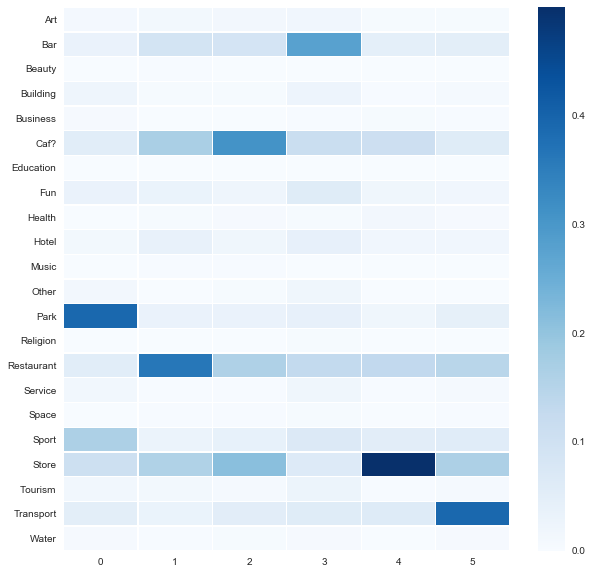

In [492]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(clus_avgs, linewidths=.3, cmap="Blues")
plt.show()

Nice! My suggestions were right!

In [220]:
df_london_merged.to_csv("E:/Programming/coursera/capstone_project/london_merged.csv", encoding="utf-8", index=None, sep=";")
df_paris_merged.to_csv("E:/Programming/coursera/capstone_project/paris_merged.csv", encoding="utf-8", index=None, sep=";")
df_berlin_merged.to_csv("E:/Programming/coursera/capstone_project/berlin_merged.csv", encoding="utf-8", index=None, sep=";")
df_madrid_merged.to_csv("E:/Programming/coursera/capstone_project/madrid_merged.csv", encoding="utf-8", index=None, sep=";")